In [39]:
# O primeiro passo para a criação da rede neural é a importação de bibliotecas.

%matplotlib inline
import pandas as pd # Biblioteca para gestão de dados
import numpy as np # Biblioteca para operações matemáticas com matrizes
import matplotlib.pyplot as plt # Biblioteca para plotagem de gráficos

In [40]:
# Em seguida, lemos o arquivo com os dados de treinamento usando a Biblioteca Pandas.

ds = pd.read_excel('dataset.xlsx')

In [41]:
# A base de dados pode ser vista a seguir, em formato de tabela.

print(ds)

           X1        X2  Y
0    0.003865  0.041168  0
1    0.006047  0.041684  0
2    0.009573  0.042209  0
3    0.037532  0.042572  0
4    0.014802  0.042734  0
..        ...       ... ..
205  4.157979  1.053691  1
206  4.113852  1.625432  1
207  4.167518  2.581314  1
208  4.172244  4.020801  1
209  4.128780  6.699484  1

[210 rows x 3 columns]


In [42]:
# Notemos que para este problema, temos duas entradas, X1 e X2, e queremos prever uma saída: O interesse, Y.
# Portanto, nossa rede neural deve ter dois nódulos de entrada e um de saída. 
# Para a camada escondida, vamos escolher um número arbitrário, como 3, que pode ser alterado posteriormente.

node_in = 2 # Número de Nódulos de Entrada
node_out = 1 # Número de Nódulos de Saída
node_hidden = 3 # Número de Nódulos na Camada Escondida

# Note, portanto, que teremos uma lista com 210 matrizes 1x2 (entradas) e 210 matrizes 1x1 (saídas)
# A camada escondida representa uma lista com 210 matrizes 1x3.

# Dessa forma podemos definir as matrizes peso entre as camadas. (2x3 e 3x1, respectivamente)
# Vamos iniciá-las como valores aleatórios seguindo uma distribuição gaussiana, usando a Biblioteca Numpy

W1 = np.random.standard_normal((node_in, node_hidden)) # Matriz de pesos entre as camadas de entrada e escondida 
W2 = np.random.standard_normal((node_hidden, node_out)) # Matriz de pesos entre as camadas de saída e escondida 

# É conveniente também inicializar a Função de Ativação. A função escolhida foi a Sigmóide:

def funact(x):
    sig = 1/(1 + np.exp(-x)) 
    return sig

# Para o caso simples em que se trata, não é necessária a inclusão de ciclos, logo nossa Rede Neural é um FNN
# Logo, no processo de Backward pass é relevante definir a função de erro quadrático:

def erro_quad(prev,real):
    return (prev - real)**2 # Note que como o resultado é sempre binário, 0 significa acerto e 1 significa erro.

# Em backpropagation se usa a regra da cadeia, então é conveniente definir as derivadas:
    
def dfunact_dx(x):                         # Derivada primeira da função sigmóide
    return funact(x)*(1 - funact(x))

def derro_dprev(prev,real):
    return 2*(prev - real)

# Por motivos didáticos, realizei o cálculo das derivadas à mão:

def dno_dvar(no,var):                  # Essa função usa o valor do nódulo no ponto e da variável de derivação, funciona
    return dfunact_dx(no)*var          # para as seguintes derivadas: dprev/dh, dprev/dw, dh/dw.

def decremento(peso,derivada,netta):   # Essa função realiza a atualização do valor do peso
    return peso - netta*derivada



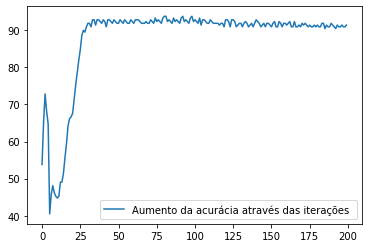

Acurácia ao final de 200 iterações: 91.42857142857143 %


In [43]:
j = 0
eta = 0.01

iteracoes = np.array([[]])
var_erro = np.array([[]])

for j in range(200):
    soma = 0
    i = 0
# Forward Pass
    for i in range(len(ds['Y'])):               # Vamos passar por todos elementos da tabela, no caso 210
        mat_in = [ds['X1'][i],ds['X2'][i]]      # Aqui definimos a matriz de entrada, pelos valores de X1 e X2 
        H = funact(np.matmul(mat_in,W1))        # Então se faz a multiplicação dessa matriz com a matriz de pesos e é então                                       
                                                # passado pela função de ativação
        previsao = funact(np.matmul(H,W2))      # O processo é repetido, porém partindo da camada escondida, para a previsão
        if previsao > 0.5:                     # Aqui transformamos o valor em binário: Há interesse (previsão >0.5), ou não
            previsao_bi = 1
        else:
            previsao_bi = 0                     
                                                # Então, descobrimos a quantidade de erros (ou seja, quando o erro quadrático
        soma = soma + erro_quad(previsao_bi,ds['Y'][i])   # retorna 1) e somamos para classificar a qualidade da NN.
        mse = soma/len(ds['Y'])
# Backward Pass
        de_dy = derro_dprev(previsao_bi,ds['Y'][i])       # Derivada do erro pela previsão
        dprev_dw = dno_dvar(previsao,H)                   # Derivada da previsão pelos pesos de 7 a 9
        dprev_dh = dno_dvar(previsao,W2)                  # Derivada da previsão pela camada escondida
        dh_dw = dfunact_dx(H).reshape(3,1)*mat_in         # Derivada da camada escondida pelos pesos de 1 a 6

        de_dw1 = de_dy*dprev_dh*dh_dw                     # Seguindo a regra da cadeia
        de_dw2 = de_dy*dprev_dw                           

        W1 = W1 - eta*de_dw1.reshape(2,3)               # Por fim, se atualiza os pesos para o novo valor otimizado 
        W2 = W2 - eta*de_dw2.reshape(3,1)
        
        

   
    iteracoes = np.append(iteracoes,j)
    var_erro = np.append(var_erro,(1 - mse)*100)

plt.plot(iteracoes,var_erro)
plt.legend(['Aumento da acurácia através das iterações '])
plt.show()
print('Acurácia ao final de',j+1,'iterações:',(1 - mse)*100,'%')

In [52]:
# Teste manual para verificação em um par ordenado da escolha

t = # Escolha a posição para teste (entre 0 e 210)

def testador(a,b):  
    mat_in = [a,b]      
    H = funact(np.matmul(mat_in,W1))        
    previsao = funact(np.matmul(H,W2))
    return previsao

def bina(previsao):
    if previsao > 0.5:
        return 1
    else:
        return 0
    
teste = decisao(ds['X1'][t],ds['X2'][t])
print('Para o par ordenado: ',ds['X1'][t],',',ds['X2'][t],', o valor esperado é de:', ds['Y'][t],'. O valor obtido é de:',bina(teste) ) 

Para o par ordenado:  0.540068318135294 , 26.7418678715534 , o valor esperado é de: 1 . O valor obtido é de: 1


In [53]:
# É interessante notar que os valores iniciais dos pesos são aleatórios, portanto algumas redes irão ter desempenho 
# inicial superior. Para demonstrar a capacidade da NN em classificar os dados, irei rodar o código 10 vezes, anotando 
# o valor inicial e final dessas, demonstrando a consistência do algoritmo.

Valores = [[75.23809523809524,97.61904761904762],[60.47619047619048,95.71428571428572],[59.523809523809526,96.66666666666667],
          [61.904761904761905,96.19047619047619],[65.23809523809524,95.71428571428572],[63.8095238095238,97.14285714285714],
           [66.66666666666667,96.66666666666667],[72.38095238095238, 96.66666666666667],[66.66666666666667,97.14285714285714],
           [64.76190476190476,95.23809523809523]]

k = 0
sum_val = 0

for k in range(len(Valores)):
    sum_val = sum_val + Valores[k][1]

media = sum_val/len(Valores)
print(media)

96.47619047619045


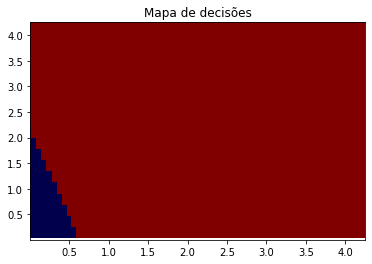

In [58]:
# Define mínimos e máximos 

x1_min = ds['X1'].min() 
x1_max = ds['X1'].max()

x2_min = ds['X2'].min()
x2_max = ds['X2'].max()
 
    
# Função de teste 

def decisao(a,b):
    c = funact(a*W1[0][0]+b*W1[1][0])
    d = funact(a*W1[0][1]+b*W1[1][1])
    e = funact(a*W1[0][2]+b*W1[1][2])
    f = funact(c*W2[0]+d*W2[1]+e*W2[2])
    return f


# Define os eixos X e Y

x1,x2 = np.meshgrid(np.linspace(x1_min,x1_max,len(ds['Y'])),np.linspace(x2_min,x2_max,len(ds['Y'])))


# Para cada par ordenado no Eixo XY, adota um valor binário

n = 0
m = 0
y_e = np.zeros((len(ds['Y']),len(ds['Y'])))

for n in range(len(ds['Y'])):
    for m in range(len(ds['Y'])):
        if decisao(x1,x2)[m][n] > 0.5:
            y_e[m][n] = 1
        else:
            y_e[m][n] = 0
        m = m + 1
    n = n + 1

    
# Plota o gráfico do tipo Heatmap

figure, axes = plt.subplots()

y_e = axes.pcolormesh(x1, x2, y_e, cmap='seismic')
axes.set_title('Mapa de decisões')
axes.axis([x1_min, x1_max,x1_min, x1_max])


plt.show()


# Note, porém, que o resultado não está na mesma escala da proposta pelo enunciado